In [4]:
import cv2
import math

count = 0
videoFile = "../video/Tom and Jerry.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)

x=1

while (cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename = "./picture/frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)

cap.release()
print("Done!")

Done!


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.utils import np_utils
from skimage.transform import resize

%matplotlib inline

data = pd.read_csv('../dataset/mapping.csv')
data.head()

X = []
for img_name in data.Image_ID:
    img = plt.imread('./picture/' + img_name)
    X.append(img)
    
X = np.array(X)

y = data.Class
dummy_y = np_utils.to_categorical(y)

image = []
for i in range(0, X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224, 224)).astype(int)
    image.append(a)  
X = np.array(image)

from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [36]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

X_train = X_train.reshape(208, 7*7*512)
X_valid = X_valid.reshape(90, 7*7*512)

train = X_train/X_train.max()
X_valid = X_valid/X_train.max()

#i. Building the model
model = Sequential()
model.add(InputLayer((7*7*512,)))
model.add(Dense(units=1024, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.summary()

#ii. Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#iii. Training the model
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________
Train on 208 samples, validate on 90 samples
Epoch 1/100
208/208 [==============================] - 4s 20ms/step - loss: 1.0027 - accuracy: 0.5288 - val_loss: 0.6714 - val_accuracy: 0.7333
Epoch 2/100
208/208 [==============================] - 4s 18ms/step - loss: 0.3509 - accuracy: 0.9087 - val_loss: 0.4757 - val_accuracy: 0.8111
Epoch 3/100
208/208 [==============================] - 4s 19ms/step - loss: 0.1506 - accuracy: 0.9663 - val_loss: 0.3777 - val_accuracy: 0.8778
Epoch 4/100
208/208 [======

Epoch 53/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0083 - accuracy: 0.9904 - val_loss: 0.2566 - val_accuracy: 0.9111
Epoch 54/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0117 - accuracy: 0.9904 - val_loss: 0.2672 - val_accuracy: 0.9000
Epoch 55/100
208/208 [==============================] - 4s 20ms/step - loss: 0.0243 - accuracy: 0.9952 - val_loss: 0.2414 - val_accuracy: 0.9222
Epoch 56/100
208/208 [==============================] - 4s 20ms/step - loss: 0.0194 - accuracy: 0.9952 - val_loss: 0.3892 - val_accuracy: 0.8556
Epoch 57/100
208/208 [==============================] - 4s 21ms/step - loss: 0.0259 - accuracy: 0.9952 - val_loss: 0.4159 - val_accuracy: 0.8556
Epoch 58/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0205 - accuracy: 0.9952 - val_loss: 0.2851 - val_accuracy: 0.8889
Epoch 59/100
208/208 [==============================] - 4s 20ms/step - loss: 0.0195 - accuracy: 0.9904 - val_loss: 0.2446 - val_ac

In [37]:
#Tom and Jerry3.mp4 이미지 추출

count = 0
videoFile = "../video/Tom and Jerry 3.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)

x=1

while (cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename = "./picture/test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)

cap.release()
print("Done!")

Done!


In [54]:
test = pd.read_csv('../dataset/testing.csv')

test_image = []
for img_name in test.Image_ID:
    img = plt.imread('./picture/' + img_name)
    test_image.append(img)    
test_img = np.array(test_image)

test_image = []
for i in range(0, test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224, 224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [55]:
#processing the images
test_image = preprocess_input(test_image)

#extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

#converting the image to 1-D form
test_image = test_image.reshape(186, 7*7*512)

#zero centered images
test_image = test_image/test_image.max()


In [56]:
model = Sequential()
model.add(InputLayer((7*7*512, ))) #input layer
model.add(Dense(units=1024, activation='sigmoid')) #hidden layer
model.add(Dropout(0.5)) #adding dropout
model.add(Dense(units=512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list=[checkpoint]

history = model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks_list)


Train on 208 samples, validate on 90 samples
Epoch 1/100
208/208 [==============================] - 4s 21ms/step - loss: 1.3530 - accuracy: 0.4038 - val_loss: 1.0950 - val_accuracy: 0.3889

Epoch 00001: val_loss improved from inf to 1.09504, saving model to weights.best.hdf5
Epoch 2/100
208/208 [==============================] - 4s 19ms/step - loss: 1.2836 - accuracy: 0.3269 - val_loss: 1.0320 - val_accuracy: 0.5000

Epoch 00002: val_loss improved from 1.09504 to 1.03196, saving model to weights.best.hdf5
Epoch 3/100
208/208 [==============================] - 4s 19ms/step - loss: 1.1699 - accuracy: 0.4663 - val_loss: 1.1297 - val_accuracy: 0.3889

Epoch 00003: val_loss did not improve from 1.03196
Epoch 4/100
208/208 [==============================] - 4s 19ms/step - loss: 1.1059 - accuracy: 0.4135 - val_loss: 0.9514 - val_accuracy: 0.6778

Epoch 00004: val_loss improved from 1.03196 to 0.95141, saving model to weights.best.hdf5
Epoch 5/100
208/208 [==============================] - 4s 


Epoch 00080: val_loss did not improve from 0.20973
Epoch 81/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0146 - accuracy: 0.9904 - val_loss: 0.2514 - val_accuracy: 0.9222

Epoch 00081: val_loss did not improve from 0.20973
Epoch 82/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0087 - accuracy: 0.9952 - val_loss: 0.3575 - val_accuracy: 0.8667

Epoch 00082: val_loss did not improve from 0.20973
Epoch 83/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0205 - accuracy: 0.9904 - val_loss: 0.4428 - val_accuracy: 0.8556

Epoch 00083: val_loss did not improve from 0.20973
Epoch 84/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0210 - accuracy: 0.9952 - val_loss: 0.3808 - val_accuracy: 0.8556

Epoch 00084: val_loss did not improve from 0.20973
Epoch 85/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0122 - accuracy: 0.9904 - val_loss: 0.2871 - val_accuracy: 0.9000

Epoch 00085: v

In [69]:
test_y = np_utils.to_categorical(test.Class)

scores = model.evaluate(test_image, test_y)

print("Real Test %s: %2.2f%%" % (model.metrics_names[1], scores[1]*100))

186/186 [==============================] - 0s 2ms/step
Real Test accuracy: 51.61%


In [65]:
predictions = model.predict_classes(test_image)

print("The screen time of None is", predictions[predictions==0].shape[0], "seconds")
print("The screen time of Jerry is", predictions[predictions==1].shape[0], "seconds")
print("The screen time of Tom is", predictions[predictions==2].shape[0], "seconds")

The screen time of None is 112 seconds
The screen time of Jerry is 0 seconds
The screen time of Tom is 74 seconds


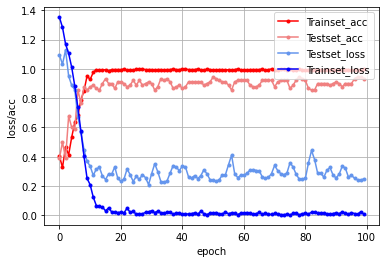

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()